In [1]:
# project: p1
# submitter: zzhou443
# partner: none
# hours: 8

In [2]:
#Q1: what is the type of 7/2
type(7/2)

float

In [3]:
#Q2: what is error
x = 4
maximum = 10
minimum = 5
error = abs(minimum - maximum) > x # True if x is outside the minimum-to-maximum range
error

True

In [4]:
#Q3: ignoring case, does word end with the suffix "esque"?
word = "KAFKAESQUE"
suffix_match = word.lower()[-5:] == "esque" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [5]:
def add(num1, num2 = None):
    if num2 == None:
        return 1 + num1
    return num1 + num2

In [6]:
#Q4: what is add(3, 4)?
add(3,4)

7

In [7]:
#Q5: what is add(9)?
add(9)

10

In [8]:
#Q6: what is status?
x = 4
if (x < 0):
    status = "negative"
elif (x > 0):
    status = "positive"
else:
    status = "zero"
status

'positive'

In [9]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [10]:
def smart_count(count_list):
    num = 0
    for item in count_list:
        if item > 10:
            continue
        if item < 0:
            break;
        num = num + item
    return num
    

In [11]:
#Q7: what is smart_count(nums)
smart_count(nums)

14

In [12]:
#Q8: what is smart_count([2, 1, 11, 3, 15, -1, 8, 2])
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [13]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [14]:
#Q9: after inserting a "z" key in coord3 (with coord3["z"] = 3.14), what is rows?
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [15]:
#q10
rows[0][-1]["x"]

8

In [16]:
#Q11
import copy
v2 = rows.copy()
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [17]:
#Q12: if we imagine the list of lists structure referenced by rows as a table, with column names in header, what is the sum of values in the "B" column?
index = header.index("B")
total = 0
for i in rows:
    total = total + i[index]
total


10007

In [18]:
#Q13: what is rows after we sort it in-place by the "B" column, ascending?
rows.sort(key = lambda row: row[header.index("B")])
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [19]:
import os 
import requests
import json
def download(filename, url):
    if os.path.exists(filename):
        return("file already exist")
    r = requests.get(url)
    r.raise_for_status()
    f = open(filename, "w")
    f.write(data)
    f.close
    
download("usd.json", "http://www.floatrates.com/daily/usd.json")
    

'file already exist'

In [20]:
#Q14: say you're going on vacation to Europe with 400 US dollars; how many Euros can you get at the current exchange rate?
f = open("usd.json")
data = json.load(f)
f.close()
data["eur"]["rate"] * 400

351.77914283400804

In [21]:
def divide(num, divisor):
    try:
        return num / divisor
    except:
        return float("nan")

In [22]:
#Q15: what is divide(3, 2)
divide(3, 2)

1.5

In [23]:
#Q16: what is divide(-3, 0)
divide(-3, 0)

nan

In [24]:
all_files = os.listdir("home-computers")
year_keys = []
for item in all_files:
    for i in range(len(item)):
        if item[i] == ".":
            year_keys.append(item[i-4 : i])
            break;
year_keys

['2018', '2017', '2015', '2014', '2016', '2013']

In [25]:
import pandas as pd
file_values = []
for item in all_files:
    value = pd.read_csv(os.path.join("home-computers", item), skiprows = 1)
    df = pd.DataFrame(value)
    df = df.set_index("Geographic Area Name")
    file_values.append(df)
file_values

years = {}
for i in range(len(year_keys)):
    years[year_keys[i]] = file_values[i]


In [26]:
#Q17: what are the keys in years?
sorted_year = sorted([int(i) for i in years])
sorted_year

[2013, 2014, 2015, 2016, 2017, 2018]

In [27]:
#Q18: how many households did Wisconsin have in 2018?
df = years["2018"]
df["Estimate!!Total"]["Wisconsin"]

2371960

In [28]:
#Q19: how many total households in the US are estimated to not have any computer at home? (2018)
years["2018"]["Estimate!!Total!!No Computer"].sum()

10285814

In [29]:
#Q20: what is the biggest per-state margin of error for "No Computer", as a fraction of the total estimate? (2018)
(years["2018"]["Margin of Error!!Total!!No Computer"] / years["2018"]["Estimate!!Total!!No Computer"]).max()

0.12375641594322287

In [30]:
#Q21: for Wisconsin and adjacent states, what percent of households are estimated to be without a computer? (2018)
percent_data = years["2018"]["Estimate!!Total!!No Computer"]  / years["2018"]["Estimate!!Total"]
state_list = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
state_dic = {}

for i in state_list:
    state_dic[i] = percent_data[i] * 100
state_dic

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

Text(0, 0.5, '% of Households w/o Computers')

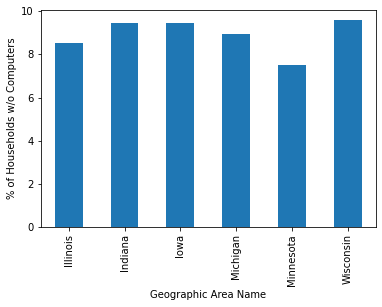

In [31]:
#Q22: same question, but answer with a bar plot.
df_state = pd.DataFrame(pd.Series(state_dic))
graph = df_state.plot.bar(legend = False)
graph.set_xlabel("Geographic Area Name")
graph.set_ylabel("% of Households w/o Computers")

Text(0, 0.5, 'WI Households without Computers (thousands)')

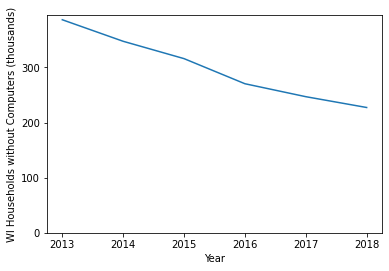

In [32]:
#Q23: how as the number of WI households without computers changed over recent years?
house_hold_list = []
y_ticks = [0, 100000, 200000, 300000]
for i in sorted_year:
    house_hold_list.append(years[str(i)]["Estimate!!Total!!No Computer"]["Wisconsin"])
house_hold_series = pd.Series(house_hold_list, index = sorted_year)
house_hold_series
graph_without_computer = pd.DataFrame(house_hold_series).plot.line(legend = False, yticks = y_ticks)
graph_without_computer.set_yticklabels([0, 100, 200, 300])
graph_without_computer.set_xlabel("Year")
graph_without_computer.set_ylabel("WI Households without Computers" + " (" + "thousands" ")")


In [33]:
import matplotlib
from matplotlib import pyplot as plt

Text(0, 0.5, 'Tablet( millons)')

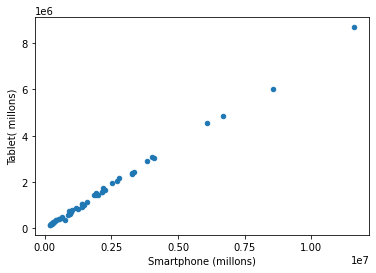

In [34]:
#Q24: what is the relationship between household with smartphones and those with tablets? (2018)
smart_phone = pd.Series(years["2018"]["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"])
tablet = pd.Series(years["2018"]["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"])
xtick = [0.0, 2.5, 5.0, 7.5, 10.0]
ytick = [0, 2, 4, 6, 8]
xtickvalue = [0.0, 2500000, 5000000, 7500000, 10000000]
ytickvalue = [0.0, 2000000, 4000000, 6000000, 8000000]
df = pd.DataFrame(smart_phone)
df["tablet"] = tablet
graph = df.plot.scatter(x = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone", y = "tablet", xticks = xtickvalue, yticks = ytickvalue)
graph.set_xlabel("Smartphone" + " " + "(" + "millons" + ")")
graph.set_ylabel("Tablet" + "( " + "millons" + ")")


In [35]:
import subprocess as sp

In [36]:
#Q25
output = sp.check_output(["git", "log"], cwd = "flask")
output = str(output, encoding = "utf-8")
output_list = output.split("\n")
output_list[0]

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [37]:
#Q26
number_list = []
for item in output_list:
    if item.startswith("commit"):
        commit_list = item.split(" ")
        number_list.append(commit_list[1])
last_50_number = []
for i in range(1,51):
    last_50_number.append(number_list[-i])
last_50_number

['33850c0ebd23ae615e6823993d441f46d80b1ff0',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 'a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '7d6b8e9ab3e738d69e39ad53a7c0f6a552d5284a',
 '3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6',
 '9dfab582d065521e9350327801ed2c5ced1c8fa1',
 '8e9bd5f009bb8756a2a7d76a4b792323eeee49d6',
 '4e1b3e1134eb478563bc434d794085d0a412cb84',
 '05f36c7f7e2df36ee28f90d99632162579b1287c',
 '1fff3e598126a084348ec2c112fdd3bc6b9a1ee0',
 '574e81f9c8bbdc41958e1e7a7613633b091101f8',
 'df929c6c77ea5490a969275e45075c29711a498c',
 '8171da88a49eba769d313a51591ee8575be59762',
 '85ca089dde8814c4a42ad4574cddce25d60e5e25',
 '4e7aa9e7f7a86ee0ea4b6801694c13151518cb52',
 '4671429a

In [38]:
#Q27
third_commit_number = number_list[-3]
sp.check_output(["git", "checkout", third_commit_number], cwd = "flask")
f = open("flask/README")
sp.check_output(["git", "checkout", "main"], cwd = "flask")
f.read()

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.
Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [39]:
#Q28
name_dic = {}
for item in output_list:
    if "Merge pull request" in item and "/" in item:
        from_index = item.find("from") + 5
        slash_index = item.find("/")
        name = item[from_index:slash_index]
        if name not in name_dic:
            name_dic[name] = 1
        else:
            name_dic[name] = name_dic[name] + 1
name_dic

{'Yourun-proger': 2,
 'olliemath': 1,
 'pallets': 204,
 'jugmac00': 1,
 'pgjones': 14,
 'eprigorodov': 1,
 'HenryKobin': 1,
 'delicb': 1,
 'vinzid': 1,
 'karintou8710': 1,
 'kkirsche': 2,
 'matipau': 1,
 'Makonede': 1,
 'sprutner': 1,
 'Jalkhov': 1,
 'KPLauritzen': 1,
 'greyli': 42,
 'esadek': 1,
 'na2shell': 1,
 'Rohan-Salwan': 1,
 'default-303': 1,
 'awijaya22': 1,
 'starlightknown': 1,
 'yuxiaoy1': 4,
 'kaushikk25': 1,
 'Elahi-cs': 1,
 'Hugo0': 1,
 'dannysepler': 1,
 'rafaVls': 1,
 'brettlangdon': 1,
 'oleksis': 1,
 'andrewjroth': 1,
 'ThiefMaster': 11,
 'kangetsu121': 1,
 'mbpreble': 1,
 'tonydelanuez': 1,
 'elliott-king': 1,
 'huimingz': 1,
 'lielfr': 1,
 'tirkarthi': 3,
 'nphilipp': 1,
 'WolframAlph': 1,
 'MLH-Fellowship': 2,
 'MartinThoma': 1,
 'ebonnecab': 1,
 'jackwardell': 3,
 'jab': 3,
 'DeepOde': 1,
 'stat1c-void': 1,
 'lgiordani': 1,
 'iomintz': 1,
 'jeffwidman': 8,
 'kx-chen': 1,
 'jeenuv': 1,
 'pgkrit': 1,
 'valleygtc': 1,
 'shanavas786': 1,
 'mattc41190': 2,
 'gnumoksha

In [40]:
#Q29
try:
    sp.check_output(["pip3", "instal"], stderr = sp.PIPE, encoding = "utf-8")
except sp.CalledProcessError as e:
    output = e.stderr
output

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [41]:
import numpy as np
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])

Text(0, 0.5, 'Millonseconds')

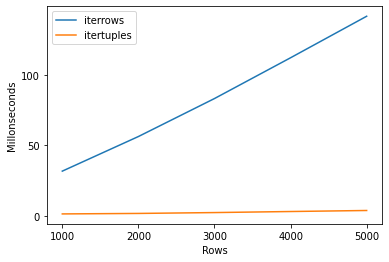

In [42]:
#Q30
from time import time

test_list = [1000, 2000, 3000, 4000, 5000]
result_iterrows_list = []
result_itertuples_list = []
for i in test_list:
    df = rand_df(i)
    t0_iterrows = time()
    for row in df.iterrows():
        pass
    t1_iterrows = time()
    result_iterrows = t1_iterrows - t0_iterrows
    result_iterrows_list.append(result_iterrows)
    
for i in test_list:
    df = rand_df(i)
    t0_itertuples = time()
    for row in df.itertuples():
        pass
    t1_itertuples = time()
    result_itertuples = t1_itertuples - t0_itertuples
    result_itertuples_list.append(result_itertuples)
dict_result = {"iterrows": result_iterrows_list, "itertuples": result_itertuples_list}
Df_result = pd.DataFrame(dict_result, index = test_list)
graph = Df_result.plot.line(xticks = test_list, yticks = [0, 0.05, 0.1])
graph.set_yticklabels([0, 50, 100])
graph.set_xlabel("Rows")
graph.set_ylabel("Millonseconds")

Text(0, 0.5, 'Millonseconds')

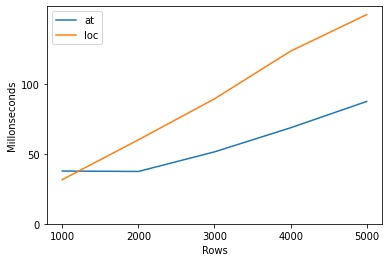

In [43]:
#Q31
result_at_list = []
result_loc_list = []
for i in test_list:
    df = rand_df(i)
    t0_at = time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1_at = time()
    result_at = t1_at - t0_at
    result_at_list.append(result_at)

for i in test_list:
    df = rand_df(i)
    t0_loc = time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1_loc = time()
    result_loc = t1_loc - t0_loc
    result_loc_list.append(result_loc)
dict_result = {"at": result_at_list, "loc": result_loc_list}
Df_result = pd.DataFrame(dict_result, index = test_list)
graph = Df_result.plot.line(xticks = test_list, yticks = [0, 0.05, 0.1])
graph.set_yticklabels([0, 50, 100])
graph.set_xlabel("Rows")
graph.set_ylabel("Millonseconds")

Text(0, 0.5, 'Millonseconds')

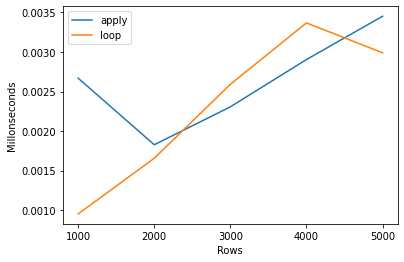

In [44]:
#Q32
result_apply_list = []
result_loop_list = []
def laugh(x):
    return "ha" * x
for i in test_list:
    df = rand_df(i)
    t0_apply = time()
    result = df["A"].apply(laugh).tolist()
    t1_apply = time()
    result_apply = t1_apply - t0_apply
    result_apply_list.append(result_apply)
    
for i in test_list:
    df = rand_df(i)
    t0_loop = time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1_loop = time()
    result_loop = t1_loop - t0_loop
    result_loop_list.append(result_loop)
    
dict_result = {"apply": result_apply_list, "loop": result_loop_list}
Df_result = pd.DataFrame(dict_result, index = test_list)
graph = Df_result.plot.line(xticks = test_list)
graph.set_xlabel("Rows")
graph.set_ylabel("Millonseconds")
